## Explatory Analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [2]:
# read csv file into pandas dataframe

listings = pd.read_csv('listings.csv')
listings.head()

id                                               name  host_id  \
0  2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
1  6606                Fab, private seattle urban cottage!    14942   
2  9419                Glorious sun room w/ memory foambed    30559   
3  9460     Downtown Convention Center B&B -- Free Minibar    30832   
4  9531                The Adorable Sweet Orange Craftsman    31481   

   host_name  neighbourhood_group   neighbourhood  latitude  longitude  \
0      Megan         Central Area         Madrona  47.61082 -122.29082   
1      Joyce  Other neighborhoods     Wallingford  47.65411 -122.33761   
2  Angielena  Other neighborhoods      Georgetown  47.55017 -122.31937   
3      Siena             Downtown      First Hill  47.61265 -122.32936   
4     Cassie         West Seattle  Fairmount Park  47.55539 -122.38474   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    296               7                 32  2020-02-01   
1  Entire home/apt     90              30                150  2019-09-28   
2     Private room     62               2                148  2019-12-27   
3     Private room     79               3                466  2020-03-07   
4  Entire home/apt    165               3                 40  2019-12-30   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.23                               2                86  
1               1.15                               3                45  
2               1.26                               8               365  
3               3.63                               4                10  
4               0.40                               2               276

We will only need some of the columns which are 'neighbourhood', 'latitude', 'longitude'. So let's create a new dataframe with the needed columns.

In [4]:
# dataframe only with the columns neighbourhood, latitude, longitude and price
listings = listings[['neighbourhood', 'latitude', 'longithttp://localhost:8889/notebooks/repos/Coursera_Capstone/capstone_the_battle_of_neighborhoods_week_2.ipynb#ude', 'price']]
listings.head()

neighbourhood  latitude  longitude  price
0         Madrona  47.61082 -122.29082    296
1     Wallingford  47.65411 -122.33761     90
2      Georgetown  47.55017 -122.31937     62
3      First Hill  47.61265 -122.32936     79
4  Fairmount Park  47.55539 -122.38474    165

Now let's see if there is any NaN values in out new dataframe.

In [23]:
listings.isnull().values.any()


False

It returns False, so we don't have any NaN valus in our dataframe. We can continue analyzing without dropping any values. Now we will create a new dataframe with the average prices for each neighborhood.

In [29]:
neighborhoods = pd.DataFrame(listings.groupby(['neighbourhood']).mean())
neighborhoods = neighborhoods.reset_index()
neighborhoods.head()


neighbourhood   latitude   longitude       price
0          Adams  47.671661 -122.385505  150.292035
1           Alki  47.575465 -122.407382  151.793478
2  Arbor Heights  47.510568 -122.380087  117.450000
3       Atlantic  47.595194 -122.304142  217.438095
4       Belltown  47.615327 -122.345001  181.958025

__Create a map of Seattle with neighborhoods.__

We will create a city of Seattle folium map in order to see the neighborhoods on the map. Feel free to click on the markers to see the neighborhood names.

In [30]:
import folium

# Seattle latitude and longitude values
from geopy.geocoders import Nominatim
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Seattle are {}, {}.'.format(latitude, longitude))


# create map of Toronto using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)
    
map_seattle

The geograpical coordinates of Seattle are 47.6038321, -122.3300624.


### Explore neighborhoods in the city of Seattle
Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [31]:
# for more information about Foursquare API credentials please read README.md file
# get credentials from .env file
from dotenv import load_dotenv
import os

load_dotenv()
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
VERSION = os.getenv('VERSION')

In [35]:
import requests

Let's create a function to get the top 100 venues within the 500 meter in each neighborhood.

In [32]:
LIMIT = 100


def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [36]:
"""
seattle_venues = getNearbyVenues(names=neighborhoods['neighbourhood'],
                                   latitudes=neighborhoods['latitude'],
                                   longitudes=neighborhoods['longitude']
                                  )
                                  """

Adams
Alki
Arbor Heights
Atlantic
Belltown
Bitter Lake
Briarcliff
Brighton
Broadview
Broadway
Bryant
Cedar Park
Central Business District
Columbia City
Crown Hill
Dunlap
East Queen Anne
Eastlake
Fairmount Park
Fauntleroy
First Hill
Fremont
Gatewood
Genesee
Georgetown
Green Lake
Greenwood
Haller Lake
Harbor Island
Harrison/Denny-Blaine
High Point
Highland Park
Holly Park
Industrial District
Interbay
International District
Laurelhurst
Lawton Park
Leschi
Lower Queen Anne
Loyal Heights
Madison Park
Madrona
Mann
Maple Leaf
Matthews Beach
Meadowbrook
Mid-Beacon Hill
Minor
Montlake
Mount Baker
North Admiral
North Beach/Blue Ridge
North Beacon Hill
North College Park
North Delridge
North Queen Anne
Olympic Hills
Phinney Ridge
Pike-Market
Pinehurst
Pioneer Square
Portage Bay
Rainier Beach
Rainier View
Ravenna
Riverview
Roosevelt
Roxhill
Seaview
Seward Park
South Beacon Hill
South Delridge
South Lake Union
South Park
Southeast Magnolia
Stevens
Sunset Hill
University District
Victory Heights
View

In [41]:
# save it into csv file to not repeat request, we will continue to use csv file now.

seattle_venues.to_csv('seattle_venues.csv')

In [54]:
seattle_venues = pd.read_csv('seattle_venues.csv')
seattle_venues = seattle_venues.drop(['Unnamed: 0'], axis = 1)
print(seattle_venues.shape)
seattle_venues.head()

(2087, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Adams              47.671661             -122.385505   
1        Adams              47.671661             -122.385505   
2        Adams              47.671661             -122.385505   
3        Adams              47.671661             -122.385505   
4        Adams              47.671661             -122.385505   

                              Venue  Venue Latitude  Venue Longitude  \
0                       Cafe Besalu       47.671971      -122.387755   
1                 Tall Grass Bakery       47.671982      -122.387690   
2                      Kimchi House       47.671372      -122.387763   
3              Gather Kitchen + Bar       47.669723      -122.384911   
4  Cupcake Royale and Verite Coffee       47.668829      -122.384378   

            Venue Category  
0                   Bakery  
1                   Bakery  
2        Korean Restaurant  
3  New American Restaurant  
4             Cupcake Shop

In [71]:
venue_count = seattle_venues.groupby('Neighborhood').count().reset_index()
venue_count.sort_values(['Venue'], ascending = False)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
9                    Broadway                    100                     100   
58                Pike-Market                    100                     100   
76        University District                    100                     100   
12  Central Business District                    100                     100   
60             Pioneer Square                    100                     100   
71           South Lake Union                     97                      97   
20                 First Hill                     85                      85   
35     International District                     77                      77   
0                       Adams                     75                      75   
79                Wallingford                     67                      67   
4                    Belltown                     65                      65   
24                 Georgetown                     52                      52   
51              North Admiral                     43                      43   
26                  Greenwood                     42                      42   
13              Columbia City                     40                      40   
66                  Roosevelt                     38                      38   
39           Lower Queen Anne                     37                      37   
23                    Genesee                     37                      37   
43                       Mann                     36                      36   
57              Phinney Ridge                     35                      35   
42                    Madrona                     28                      28   
17                   Eastlake                     28                      28   
83                   Westlake                     27                      27   
86             Yesler Terrace                     25                      25   
1                        Alki                     25                      25   
41               Madison Park                     23                      23   
5                 Bitter Lake                     22                      22   
21                    Fremont                     22                      22   
29      Harrison/Denny-Blaine                     22                      22   
48                      Minor                     21                      21   
49                   Montlake                     21                      21   
7                    Brighton                     19                      19   
84           Whittier Heights                     19                      19   
34                   Interbay                     18                      18   
82              West Woodland                     18                      18   
61                Portage Bay                     18                      18   
74                    Stevens                     18                      18   
3                    Atlantic                     18                      18   
32                 Holly Park                     17                      17   
81            West Queen Anne                     17                      17   
59                  Pinehurst                     16                      16   
44                 Maple Leaf                     16                      16   
33        Industrial District                     15                      15   
64                    Ravenna                     15                      15   
52          North Beacon Hill                     14                      14   
54             North Delridge                     14                      14   
15                     Dunlap                     14                      14   
27                Haller Lake                     13                      13   
25                 Green Lake                     11                      11   
8                

In [61]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 282 uniques categories.


It seems that Broadway, Pike-Market, University District, Central Business District and Pioneer Square neighborhoods already hit the 100 venue limit. There may be more than 100 venues in these neighborhoods and we can see how many there are by increasing the limit if we like.

### Analyze each neighborhood

In [72]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
Neighborhood = seattle_onehot['Neighborhood']
seattle_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
seattle_onehot.insert(0, 'Neighborhood', Neighborhood)

seattle_onehot.head()

Neighborhood  ATM  Adult Boutique  African Restaurant  American Restaurant  \
0        Adams    0               0                   0                    0   
1        Adams    0               0                   0                    0   
2        Adams    0               0                   0                    0   
3        Adams    0               0                   0                    0   
4        Adams    0               0                   0                    0   

   Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0             0         0       0                       0            0   
1             0         0       0                       0            0   
2             0         0       0                       0            0   
3             0         0       0                       0            0   
4             0         0       0                       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Australian Restaurant  Auto Dealership  Auto Workshop  Automotive Shop  \
0                      0                0              0                0   
1                      0                0              0                0   
2                      0                0              0                0   
3                      0                0              0                0   
4                      0                0              0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0          0           0       1     0    0               0                 0   
1          0           0       1     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Bike Shop  Bistro  Board Shop  Boat Rental  Boat or Ferry  Bookstore  \
0          0       0           0            0              0          0   
1          0       0           0            0              0          0   
2          0       0           0            0              0          0   
3          0       0           0            0              0          0   
4          0       0           0            0              0          0   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0                 0         0              0           0               0   
1                 0         0              0           0               0   
2                 0         0              0           0               0   
3                 0         0              0           0               0   
4                 0         0              0           0               0   

   Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint  \
0        0            0                0         0             0   
1        0            0                0         0             0   
2        0            0                0         0             0   
3        0            0               

In [73]:
seattle_onehot.shape

(2087, 282)

__Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.__


In [74]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped.head()

Neighborhood  ATM  Adult Boutique  African Restaurant  \
0          Adams  0.0             0.0            0.000000   
1           Alki  0.0             0.0            0.000000   
2  Arbor Heights  0.0             0.0            0.000000   
3       Atlantic  0.0             0.0            0.055556   
4       Belltown  0.0             0.0            0.000000   

   American Restaurant  Antique Shop  Aquarium  Arcade  \
0                  0.0           0.0       0.0     0.0   
1                  0.0           0.0       0.0     0.0   
2                  0.0           0.0       0.0     0.0   
3                  0.0           0.0       0.0     0.0   
4                  0.0           0.0       0.0     0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0         0.00         0.0                  0.0   
1                     0.0         0.04         0.0                  0.0   
2                     0.0         0.00         0.0                  0.0   
3                     0.0         0.00         0.0                  0.0   
4                     0.0         0.00         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0               0.0                 0.0                    0.0   
1               0.0                 0.0                    0.0   
2               0.0                 0.0                    0.0   
3               0.0                 0.0                    0.0   
4               0.0                 0.0                    0.0   

   Auto Dealership  Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  \
0              0.0            0.0              0.0   0.013333         0.0   
1              0.0            0.0              0.0   0.000000         0.0   
2              0.0            0.0              0.0   0.000000         0.0   
3              0.0            0.0              0.0   0.000000         0.0   
4              0.0            0.0              0.0   0.000000         0.0   

     Bakery      Bank       Bar  Baseball Field  Basketball Court  Beach  \
0  0.040000  0.013333  0.026667        0.013333               0.0    0.0   
1  0.000000  0.000000  0.000000        0.000000               0.0    0.0   
2  0.000000  0.000000  0.000000        0.000000               0.0    0.0   
3  0.055556  0.055556  0.000000        0.000000               0.0    0.0   
4  0.046154  0.000000  0.076923        0.000000               0.0    0.0   

   Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Bike Shop  \
0       0.00              0.0  0.013333     0.013333    0.000000        0.0   
1       0.04              0.0  0.000000     0.000000    0.000000        0.0   
2       0.00              0.0  0.000000     0.000000    0.000000        0.0   
3       0.00              0.0  0.000000     0.000000    0.000000        0.0   
4       0.00              0.0  0.015385     0.000000    0.015385        0.0   

     Bistro  Board Shop  Boat Rental  Boat or Ferry  Bookstore  \
0  0.000000         0.0          0.0            0.0   0.013333   
1  0.000000         0.0          0.0            0.0   0.000000   
2  0.000000         0.0          0.0            0.0   0.000000   
3  0.000000         0.0          0.0            0.0   0.000000   
4  0.015385         0.0          0.0            0.0   0.000000   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0          0.000000       0.0            0.0         0.0        0.000000   
1          0.000000       0.0            0.0         0.0        0.000000   
2          0.000000       0.0            0.0         0.0        0.000000   
3          0.000000       0.0            0.0         0.0        0.000000   
4          0.015385       0.0            0.0         0.0        0.046154   

    Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint  \
0  0.000000          0.0              0.0       0.0      0.053333   
1  0.000000          0.0              0.0       0.0  

In [75]:
# function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

__Now let's create the new dataframe and display the top 10 venues for each neighborhood.__

In [77]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood     1st Most Common Venue 2nd Most Common Venue  \
0          Adams            Ice Cream Shop          Burger Joint   
1           Alki               Coffee Shop                  Park   
2  Arbor Heights                       Spa           Yoga Studio   
3       Atlantic  Mediterranean Restaurant                  Park   
4       Belltown                       Bar           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0       Thai Restaurant                Bakery           Coffee Shop   
1    Italian Restaurant        Ice Cream Shop                 Trail   
2           Fish Market           Event Space    Falafel Restaurant   
3    Seafood Restaurant        Sandwich Place                  Bank   
4        Breakfast Spot                Bakery    Italian Restaurant   

  6th Most Common Venue 7th Most Common Venue  \
0      Sushi Restaurant    Mexican Restaurant   
1            Sports Bar     Fish & Chips Shop   
2        Farmers Market  Fast Food Restaurant   
3                Bakery           Dry Cleaner   
4           Coffee Shop      Sushi Restaurant   

                      8th Most Common Venue 9th Most Common Venue  \
0                                  Dive Bar          Dessert Shop   
1                         French Restaurant           Event Space   
2                                     Field     Fish & Chips Shop   
3  Residential Building (Apartment / Condo)                 Trail   
4                                       Gym              Dive Bar   

  10th Most Common Venue  
0     Italian Restaurant  
1              Beach Bar  
2            Flea Market  
3             Skate Park  
4   Marijuana Dispensary

### Cluster Neighborhoods

First we will use the __elbow method__ to find the optimum __k__ value of the K-means algorithm.

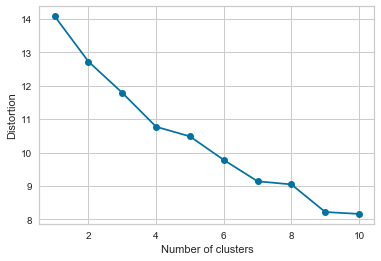

In [108]:
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(seattle_grouped_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()



For our data, elbow method did not actually produce an elbow where the rest of the line flattened out. So we will try another method which is called __Silhouette Score__ to find the optimal __k__.

In [198]:
from sklearn.metrics import silhouette_score

# create a dictionary with k as key and silhouette score as value

k_vs_score = {}

for n_clusters in range(2,15):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(seattle_grouped_clustering)
    centers = clusterer.cluster_centers_

    k_vs_score[n_clusters] = silhouette_score(seattle_grouped_clustering, preds)
    
k_vs_score

{2: 0.26646157600165915,
 3: 0.2754589659149378,
 4: 0.39523336860239716,
 5: 0.37337038657707367,
 6: 0.3403889279197885,
 7: 0.312939043978033,
 8: 0.30104191947973763,
 9: 0.1471024306592838,
 10: 0.17652229702158573,
 11: 0.03524387144074359,
 12: 0.19304349248651703,
 13: 0.14193381543681205,
 14: 0.1509387896095098}

The silhouette score varies between -1 and 1 where 1 means the data instance is matched within its cluster closely. So we want the score as close to 1 as possible to select our number of clusters. Thus we will select the k value where the silhouette score is maximum.

In [199]:
# get the k number where silhouette score is maximum in range
k = max(k_vs_score, key=k_vs_score.get)

# set number of clusters
kclusters = k

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])